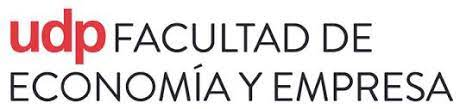



# UDP - Bussines Analytics 1


### Contenido de la clase:

### Exploratory Data Analysis

### Contenido de la clase
* Aspectos Generales
* Ejemplos
* Ejercicios

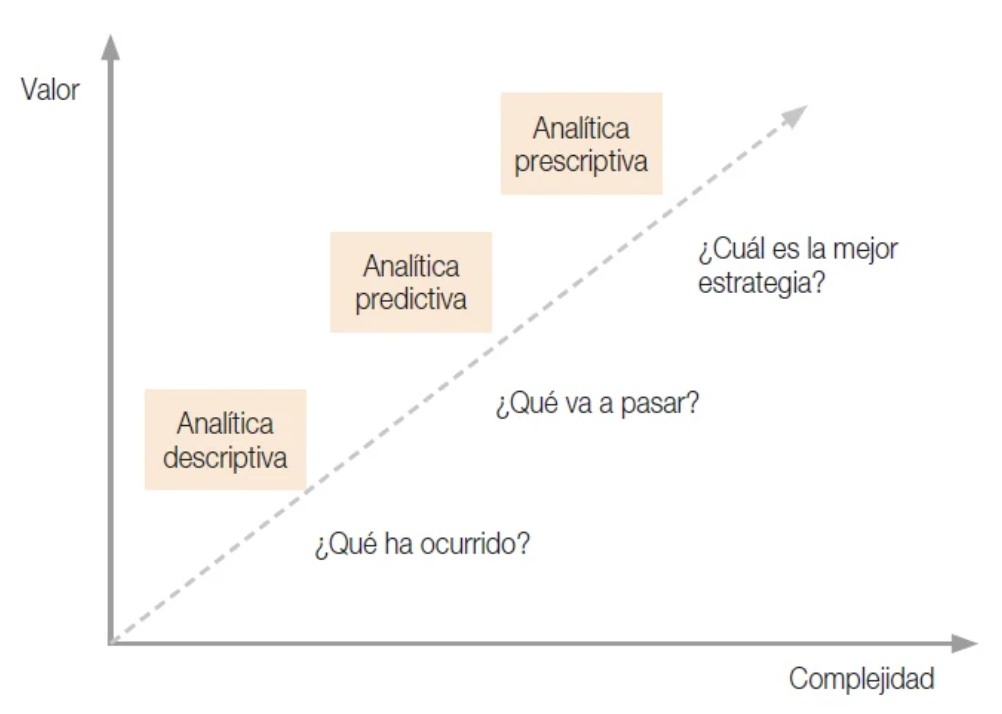

## Hacia donde vamos...
* Analítica Descriptiva:
  * Preprocessing
  * Exploratory Data Analysis
    * Análisis Univariado: distribución normal?
    * Test de comparación de médias: t-test, Chi2, KS, etc

In [1]:
# Librerías de tratamiento de datos (las principales)
import pandas as pd
import numpy as np
import missingno as msno


# Librerías de gráficas
import matplotlib.pyplot as plt
import seaborn as sns
# complementa algunas visualizaciones
%matplotlib inline
# apply some cool styling
sns.set(color_codes=True)



# Librerías de advertencias
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("/content/sample_data/datacar.csv")
# To display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# Muestra de últimos datos
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [4]:
# Tipos de datos
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [5]:
# Se eliminan las columnas que no se usarán (drop)
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity',
              'Number of Doors', 'Vehicle Size'],axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [6]:
# Renombrar columnas para facilitar el tratamiento
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders",
                        "Transmission Type": "Transmission",
                        "Driven_Wheels": "Drive_Mode",
                        "highway MPG": "MPG-H",
                        "city mpg": "MPG-C", "MSRP": "Price" })
# df.rename(columns={'oldName1': 'newName1',
                    # 'oldName2': 'newName2'}, inplace=True)

df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive_Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [10]:
# Que tamaño tiene el df? lo podemos revisar con .shape (muestra las filas x columnas)
df.shape

(11914, 10)

In [12]:
# Se crea una subset para cuantificar los datos duplicados
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [13]:
# Cuantos datos hay por cada columna?
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive_Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [14]:
# Se eliminan los datos duplicados
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive_Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [15]:
# Cuantos datos hay por cada columna ahora?
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive_Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

In [16]:
# hay datos nulos?
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive_Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [17]:
# Dropping the missing values.
df = df.dropna()
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive_Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [18]:
# Cuantos datos nulos quedan ahora?
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive_Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


## Detección de outliers

<Axes: xlabel='Price'>

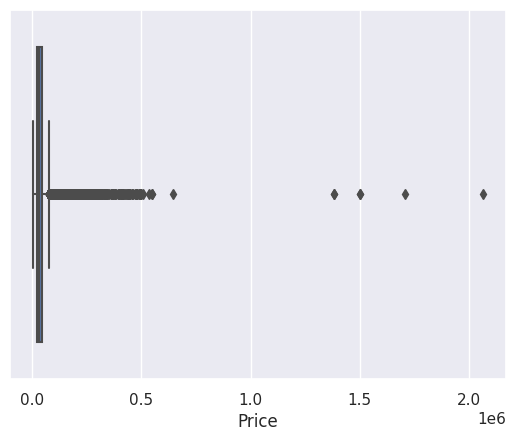

In [19]:
# Ejemplo de uso de boxplot
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

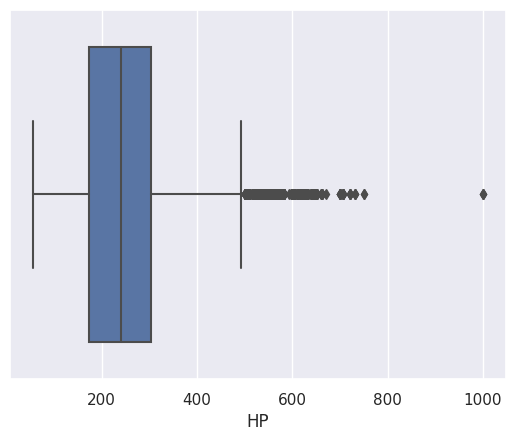

In [20]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

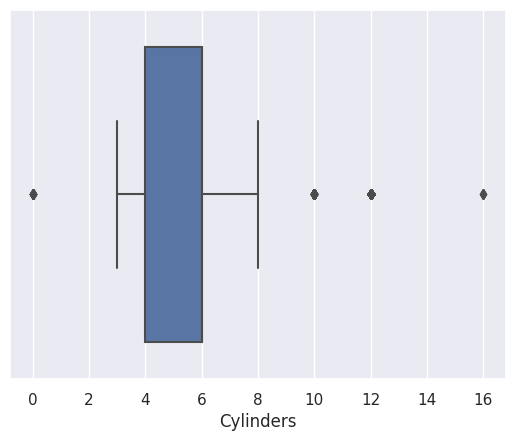

In [21]:
sns.boxplot(x=df['Cylinders'])

In [22]:
# Se calculas los Cuantiles del df
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
# Que calculamos acá?
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


In [23]:
# Que estamos calculando acá? Si ya calculamos los Q1 y Q3?
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(9191, 10)

### Revisamos algunas distribuciones de variables

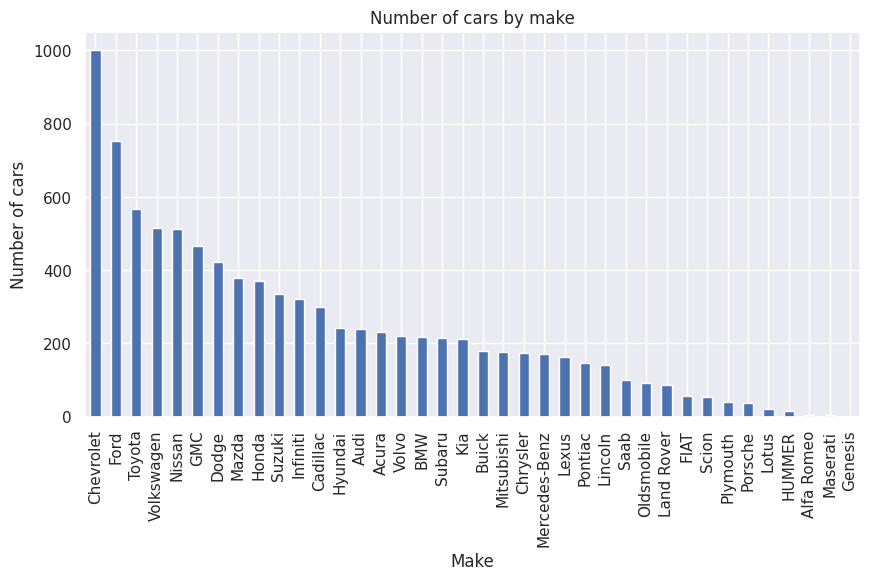

In [24]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


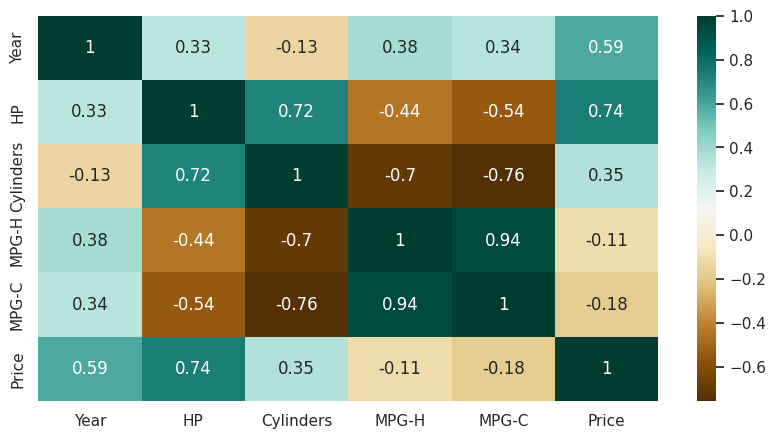

In [25]:
# Coeficiente de correlación
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [26]:
# Determinamos los promedio de las variables numéricos
prom_HP = df.HP.mean()
prom_Price = df.Price.mean()

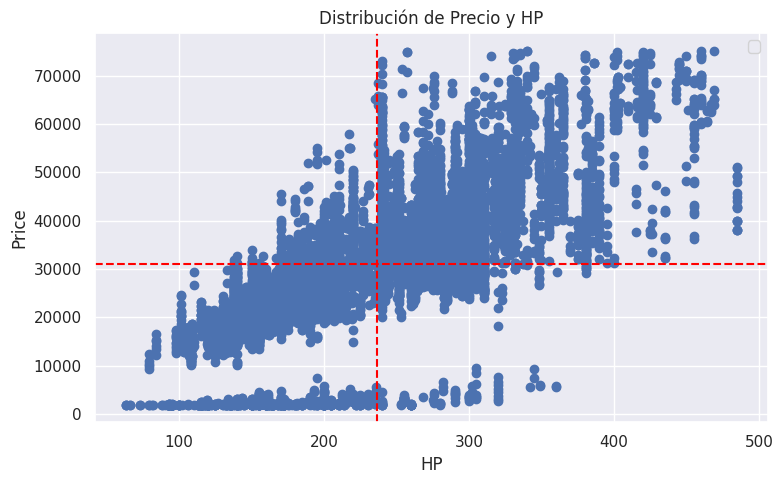

In [30]:
# Scatter plot para visualizar datos numéricos
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(df['HP'], df['Price'])

plt.axvline(x=prom_HP, color='red', linestyle='--', linewidth=1.5)
plt.axhline(y=prom_Price, color='red', linestyle='--', linewidth=1.5)

plt.title('Distribución de Precio y HP')

ax.set_xlabel('HP')
ax.set_ylabel('Price')

plt.legend()
plt.tight_layout();
plt.show();



### Uso de tablas de contingencia

### Uso de tablas de contingencia con Pandas

In [40]:
# Tipo de Transmission por cada marca
brand_table = pd.crosstab(index=df.Transmission, columns=df.Make)
brand_table

Make,Acura,Alfa Romeo,Audi,BMW,Buick,Cadillac,Chevrolet,Chrysler,Dodge,FIAT,...,Plymouth,Pontiac,Porsche,Saab,Scion,Subaru,Suzuki,Toyota,Volkswagen,Volvo
Transmission,,,,,,,,,,,,,,,,,,,,,
AUTOMATED_MANUAL,20,5,90,5,0,0,0,0,0,0,...,0,0,7,0,0,0,0,3,138,0
AUTOMATIC,165,0,120,161,180,296,708,160,314,22,...,20,104,6,60,28,143,216,453,212,202
MANUAL,47,0,30,52,0,4,293,13,109,36,...,19,41,25,41,27,71,119,111,165,19
UNKNOWN,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0


In [41]:
# Marca por cada tipo de transmisión
Transmission_table = pd.crosstab(index=df.Make, columns=df.Transmission, margins=True)
Transmission_table

Transmission,AUTOMATED_MANUAL,AUTOMATIC,MANUAL,UNKNOWN,All
Make,,,,,
Acura,20,165,47,0,232
Alfa Romeo,5,0,0,0,5
Audi,90,120,30,0,240
BMW,5,161,52,0,218
Buick,0,180,0,0,180
Cadillac,0,296,4,0,300
Chevrolet,0,708,293,0,1001
Chrysler,0,160,13,0,173
Dodge,0,314,109,0,423


In [42]:
# Vamos a crear diccionario para asignar el continen de origen de la marca

continent = {'Chevrolet': 'America','Ford': 'America','Toyota':'Asia','Volkswagen':'Europe','Nissan':'Asia',
               'GMC':'America','Dodge':'America','Mazda':'Asia','Honda':'Asia','Suzuki':'Asia','Infiniti':'Asia',
               'Cadillac':'America','Hyundai':'Asia','Audi':'Europe','Acura':'Asia','Volvo':'Europe','BMW':'Europe',
               'Subaru':'Asia','Kia':'Asia','Buick':'America','Mitsubishi':'Asia','Chrysler':'America',
               'Mercedes-Benz':'Europe','Lexus':'Asia','Pontiac':'America','Lincoln':'America','Saab':'Europe',
               'Oldsmobile':'America','Land Rover':'Europe','FIAT':'Europe','Scion':'Asia','Plymouth':'America',
               'Porsche':'Europe','Lotus':'Europe','HUMMER':'America','Alfa Romeo':'Europe','Maserati':'Europe',
               'Genesis':'Asia'}

In [43]:
# A través de un ciclo for y if-else, se crea una nueva columna en el df original para asignar el continente a cada marca.
for index, row in df.iterrows():
    if row['Make'] in continent.keys():
        df.at[index, 'Continent'] = continent[row['Make']]
    else:
        df.at[index, 'Continent'] = 'N/A'

df.sample(10)


,Make,Model,Year,HP,Cylinders,Transmission,Drive_Mode,MPG-H,MPG-C,Price,Continent
1165,GMC,Acadia,2017,310.0,6.0,AUTOMATIC,all wheel drive,25,18,41450,America
1410,Nissan,Altima,2016,270.0,6.0,AUTOMATIC,front wheel drive,32,22,32090,Asia
11887,BMW,Z3,2002,225.0,6.0,MANUAL,rear wheel drive,26,19,37900,Europe
11711,Suzuki,XL7,2008,252.0,6.0,AUTOMATIC,front wheel drive,22,16,23549,Asia
4237,Suzuki,Esteem,2001,122.0,4.0,MANUAL,front wheel drive,31,24,14699,Asia
4997,Nissan,Frontier,2016,152.0,4.0,MANUAL,rear wheel drive,23,19,22180,Asia
11694,Suzuki,XL7,2007,252.0,6.0,AUTOMATIC,all wheel drive,21,16,31749,Asia
1191,Plymouth,Acclaim,1995,100.0,4.0,AUTOMATIC,front wheel drive,26,19,2000,America
7087,Ford,Mustang,2017,310.0,4.0,MANUAL,rear wheel drive,30,21,25645,America
10487,Acura,TL,2014,305.0,6.0,AUTOMATIC,all wheel drive,26,18,43310,Asia


In [44]:
# Entonces podemos crear una tabla de contingencia mostrando por continen
Continent_table = pd.crosstab(index=df.Continent, columns=df.Cylinders, margins=True)
Continent_table

Cylinders,3.0,4.0,5.0,6.0,8.0,All
Continent,,,,,,
America,1,938,22,1826,946,3733
Asia,2,1899,1,1616,263,3781
Europe,0,977,119,490,91,1677
All,3,3814,142,3932,1300,9191


## Análisis Univariado

* Antes de realizar las pruebas, debes cambiar algunos tipos de datos la variable Year y Cylinders a tipo 'object'
* Analizar los tipos de distribución de las variables numéricas.
* Use estadística descriptiva
* Probar distribución normal. Investigar los test y scripts para desarrollar esto.
* Recomiendo revisar la librería Scipy y los gráficos de distribución de Seaborn y Matplotlib
  * Link: https://scipy.org/
